In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.path.abspath("")
print(np.__version__)

2.0.2


In [3]:
adf = pd.read_csv('metadata.csv')

adf.head()

,file_name,language,transcript,case_details,case_pdf
0,audio-wav-16khz/1112259_normalized.wav,en,We would like to inform you that there is an o...,cease-desist-letter-every1-telecom,pdf_files/pointofnoentry-every1telecomceasedes...
1,audio-wav-16khz/58345_normalized.wav,en,to connect with Apple Support Advisor. Press 2...,cease-desist-letter-peerless-network-inc,pdf_files/pointofnoentry-peerlessceasedesistle...
2,audio-wav-16khz/936704_normalized.wav,en,Hello. This call is to inform you that a pre-a...,cease-desist-letter-one-eye-llc,pdf_files/pointofnoentry-oneeyecdletter.pdf
3,audio-wav-16khz/1100696_normalized.wav,en,"one to start your claim. Otherwise, press 2 to...",cease-desist-letter-business-telecommunication...,pdf_files/pointofnoentry-businesstelecomceased...
4,audio-wav-16khz/807777_normalized.wav,en,Thank you for choosing Hilton Hotels. We would...,cease-desist-letter-hfa-services-llc-also-dba-...,pdf_files/pointofnoentry-hfaservsceasedesistle...


In [4]:
adf = adf[['file_name', 'transcript']]
adf.head()

,file_name,transcript
0,audio-wav-16khz/1112259_normalized.wav,We would like to inform you that there is an o...
1,audio-wav-16khz/58345_normalized.wav,to connect with Apple Support Advisor. Press 2...
2,audio-wav-16khz/936704_normalized.wav,Hello. This call is to inform you that a pre-a...
3,audio-wav-16khz/1100696_normalized.wav,"one to start your claim. Otherwise, press 2 to..."
4,audio-wav-16khz/807777_normalized.wav,Thank you for choosing Hilton Hotels. We would...


In [5]:
adf = adf[['transcript']].rename(columns={'transcript': 'text'})

adf['label'] = 1

adf = adf[['label','text']]

adf.to_csv('modified_dataset.csv', index=False)

adf.head()

,label,text
0,1,We would like to inform you that there is an o...
1,1,to connect with Apple Support Advisor. Press 2...
2,1,Hello. This call is to inform you that a pre-a...
3,1,"one to start your claim. Otherwise, press 2 to..."
4,1,Thank you for choosing Hilton Hotels. We would...


In [6]:
adf2 = pd.read_csv("28_000_Detailed_Phishing_Conversations_Dataset.csv")

adf2.head()

,phishing_message,response
0,Limited-time offer: Act now to claim your excl...,I don't remember signing up for this service. ...
1,Your subscription will expire soon. Renew now ...,This seems like a scam. I'm not comfortable sh...
2,Immediate action required! Your account will b...,I'm not sure if this is legitimate. Can you gi...
3,Immediate action required! Your account will b...,I'm not sure if this is legitimate. Can you gi...
4,Limited-time offer: Act now to claim your excl...,I don't remember signing up for this service. ...


In [7]:
adf2 = adf2[['phishing_message']].rename(columns={'phishing_message': 'text'})

adf2['label'] = 1

adf2 = adf2[['label','text']]

adf2.to_csv('modified_dataset2.csv', index=False)

adf2.head()

,label,text
0,1,Limited-time offer: Act now to claim your excl...
1,1,Your subscription will expire soon. Renew now ...
2,1,Immediate action required! Your account will b...
3,1,Immediate action required! Your account will b...
4,1,Limited-time offer: Act now to claim your excl...


In [9]:
posv1 = pd.read_csv('Conversation.csv')
posv1.head()

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [10]:
posv1 = posv1[['question', 'answer']].rename(columns={'question': 'left', 'answer': 'right'})

posv1 = posv1[['left', 'right']]

posv1.head()
posv1 = posv1.dropna()
print(posv1.isna().sum())

left     0
right    0
dtype: int64


In [11]:
posv1.duplicated().sum()

np.int64(1)

In [12]:
posv1 = posv1.drop_duplicates(keep='first')
posv1.duplicated().sum()

np.int64(0)

In [13]:
posv1['text'] = posv1['left'] + ' ' + posv1['right']


posv2 = posv1[['text']].copy()

posv2 = posv2.reset_index(drop=True)


print(posv2)

                                                   text
0     hi, how are you doing? i'm fine. how about you...
1     i'm fine. how about yourself? i'm pretty good....
2     i'm pretty good. thanks for asking. no problem...
3     no problem. so how have you been? i've been gr...
4     i've been great. what about you? i've been goo...
...                                                 ...
3719  that's a good question. maybe it's not old age...
3720            are you right-handed? yes. all my life.
3721  yes. all my life. you're wearing out your righ...
3722  you're wearing out your right hand. stop using...
3723  but i do all my writing with my right hand. st...

[3724 rows x 1 columns]


In [14]:
posv2['label'] = 0

posv3 = posv2[['label','text']]

posv3.to_csv('modified_dataset3.csv', index=False)

posv3.head()

,label,text
0,0,"hi, how are you doing? i'm fine. how about you..."
1,0,i'm fine. how about yourself? i'm pretty good....
2,0,i'm pretty good. thanks for asking. no problem...
3,0,no problem. so how have you been? i've been gr...
4,0,i've been great. what about you? i've been goo...


In [15]:
pos_df2 = pd.read_csv("line_index_all.csv")

pos_df2.head()

,EN1223,wef_12484_01482829612,The sun provides energy
0,BI0113,wef_12484_01345932698,Zoe invited you to an event
1,EN0971,wef_12484_00999757777,This is the cinematic superhero showdown you'...
2,EN0026,wef_12484_00036278823,That quick beige fox jumped in the air over e...
3,EN1472,wef_12484_00458512623,The song was accompanied by two music videos ...
4,EN0005,wef_12484_00445516961,People look but no one ever finds it


In [16]:
pos_df2.columns = pos_df2.columns.str.strip()

pos_df2 = pos_df2[['The sun provides energy']].rename(columns={'The sun provides energy': 'text'})

pos_df2['label'] = 0


pos_df2 = pos_df2[['label', 'text']]

pos_df2.to_csv('modified_dataset4.csv', index=False)

In [18]:
pos_df2.head(5)

,label,text
0,0,Zoe invited you to an event
1,0,This is the cinematic superhero showdown you'...
2,0,That quick beige fox jumped in the air over e...
3,0,The song was accompanied by two music videos ...
4,0,People look but no one ever finds it


In [20]:
pos_df3 = pd.read_csv('10_000_Safe_Conversations_Dataset.csv')

pos_df3.head()

,conversation_start,response
0,"Hello, did you catch the game last night?","Yeah, it's been a while! Good to see you."
1,Good evening! Any weekend plans?,"I've been busy with work, but all is good."
2,Good evening! Any weekend plans?,"My day has been pretty good, how about yours?"
3,Good evening! Any weekend plans?,"Not much, just relaxing. How about you?"
4,"Hi, how are you?","Not yet, I'm still deciding what to do."


In [21]:
print(pos_df3.isna().sum())

conversation_start    0
response              0
dtype: int64


In [22]:
pos_df3['text'] = pos_df3['conversation_start'] + ' ' + pos_df3['response']


pos_df3 = pos_df3[['text']].copy()

pos_df3 = pos_df3.reset_index(drop=True)


print(pos_df3)

                                                   text
0     Hello, did you catch the game last night? Yeah...
1     Good evening! Any weekend plans? I've been bus...
2     Good evening! Any weekend plans? My day has be...
3     Good evening! Any weekend plans? Not much, jus...
4     Hi, how are you? Not yet, I'm still deciding w...
...                                                 ...
9995  Hi, how's the weather over there? It's sunny a...
9996  Hi, what's new with you? I'm doing great, than...
9997  Good evening! Any weekend plans? Yeah, it's be...
9998  Hi, how's work going? Not yet, I'm still decid...
9999  Hey, what have you been up to? Not yet, I'm st...

[10000 rows x 1 columns]


In [23]:
pos_df3['label'] = 0

pos_df3 = pos_df3[['label','text']]

pos_df3.to_csv('modified_dataset5.csv', index=False)

pos_df3.head()

,label,text
0,0,"Hello, did you catch the game last night? Yeah..."
1,0,Good evening! Any weekend plans? I've been bus...
2,0,Good evening! Any weekend plans? My day has be...
3,0,"Good evening! Any weekend plans? Not much, jus..."
4,0,"Hi, how are you? Not yet, I'm still deciding w..."


In [24]:
final_safe = pd.concat([posv3, pos_df2, pos_df3], ignore_index=True)


final_safe.to_csv('merged_dataset.csv', index=False)

In [25]:
final_safe.head()

,label,text
0,0,"hi, how are you doing? i'm fine. how about you..."
1,0,i'm fine. how about yourself? i'm pretty good....
2,0,i'm pretty good. thanks for asking. no problem...
3,0,no problem. so how have you been? i've been gr...
4,0,i've been great. what about you? i've been goo...


In [26]:
final_phish = pd.concat([adf, adf2], ignore_index=True)


final_phish.to_csv('merged_dataset.csv', index=False)

In [27]:
final_phish.head()

,label,text
0,1,We would like to inform you that there is an o...
1,1,to connect with Apple Support Advisor. Press 2...
2,1,Hello. This call is to inform you that a pre-a...
3,1,"one to start your claim. Otherwise, press 2 to..."
4,1,Thank you for choosing Hilton Hotels. We would...


In [28]:
final_audio = pd.concat([final_safe, final_phish], ignore_index=True)


final_audio.to_csv('merged_dataset.csv', index=False)

In [29]:
final_audio.head(10)

,label,text
0,0,"hi, how are you doing? i'm fine. how about you..."
1,0,i'm fine. how about yourself? i'm pretty good....
2,0,i'm pretty good. thanks for asking. no problem...
3,0,no problem. so how have you been? i've been gr...
4,0,i've been great. what about you? i've been goo...
5,0,i've been good. i'm in school right now. what ...
6,0,what school do you go to? i go to pcc.
7,0,i go to pcc. do you like it there?
8,0,do you like it there? it's okay. it's a really...
9,0,it's okay. it's a really big campus. good luck...


In [30]:
final_audio.tail(10)

,label,text
61022,1,Immediate action required! Your account will b...
61023,1,Your payment is overdue. Avoid penalties by up...
61024,1,Urgent! We detected unauthorized access to you...
61025,1,You have an unpaid invoice. Your service will ...
61026,1,Congratulations! You've won a luxury vacation....
61027,1,Your account will be permanently locked if you...
61028,1,Urgent! We detected unauthorized access to you...
61029,1,Limited-time offer: Act now to claim your excl...
61030,1,Important: Your account security is at risk. P...
61031,1,Your subscription will expire soon. Renew now ...


In [31]:
final_audio.to_csv('final_audio_dataset.csv', index=False)

# Confirm export by displaying the first few rows
final_audio.head()

,label,text
0,0,"hi, how are you doing? i'm fine. how about you..."
1,0,i'm fine. how about yourself? i'm pretty good....
2,0,i'm pretty good. thanks for asking. no problem...
3,0,no problem. so how have you been? i've been gr...
4,0,i've been great. what about you? i've been goo...


In [32]:
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
ps = PorterStemmer()

def cleaned_data(text):

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphanumeric characters except letters and numbers
    text = re.sub('[^a-zA-Z0-9]', ' ', text)

    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Tokenize the cleaned text
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)

    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
final_audio['cleaned_text'] = final_audio['text'].apply(cleaned_data)

In [36]:
final_audio.head()

,label,text,cleaned_text
0,0,"hi, how are you doing? i'm fine. how about you...",hi fine
1,0,i'm fine. how about yourself? i'm pretty good....,fine pretti good thank ask
2,0,i'm pretty good. thanks for asking. no problem...,pretti good thank ask problem
3,0,no problem. so how have you been? i've been gr...,problem great
4,0,i've been great. what about you? i've been goo...,great good school right


In [38]:
final_audio = final_audio[['label','cleaned_text']]

final_audio.to_csv('modified_dataset99.csv', index=False)

final_audio.head()

,label,cleaned_text
0,0,hi fine
1,0,fine pretti good thank ask
2,0,pretti good thank ask problem
3,0,problem great
4,0,great good school right


In [39]:
final_audio.tail()

,label,cleaned_text
61027,1,account perman lock respond within 24 hour ple...
61028,1,urgent detect unauthor access account verifi i...
61029,1,limit time offer act claim exclus prize need b...
61030,1,import account secur risk pleas confirm person...
61031,1,subscript expir soon renew provid payment deta...


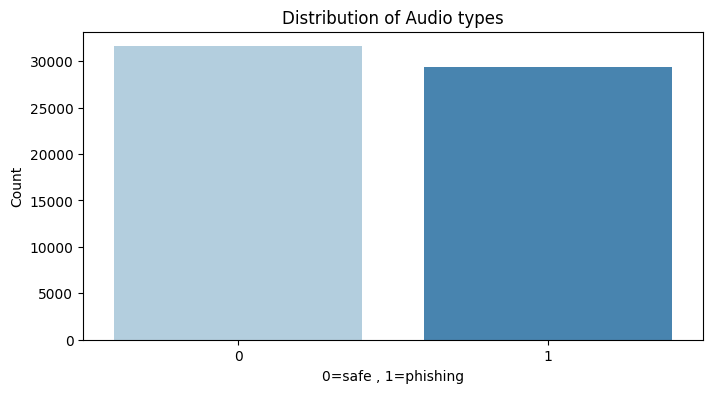

In [40]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(data=final_audio, x='label', palette='Blues')
plt.xlabel("0=safe , 1=phishing")
plt.ylabel("Count")
plt.title("Distribution of Audio types")
plt.show()

In [41]:
vdffinal = pd.read_csv('modified_dataset99.csv')

In [42]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [43]:
vdffinal = vdffinal.dropna(subset=['cleaned_text'])
X = tfidf.fit_transform(vdffinal['cleaned_text']).toarray()
X.shape

(61030, 5000)

In [44]:
print("Total features:", len(tfidf.get_feature_names_out()))

Total features: 5000


In [45]:
y = vdffinal['label'].values

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score

acc_set={}
rf = RandomForestClassifier()

# fitting model
rf.fit(X_train, y_train)

# predictions
y_pred = rf.predict(X_test)
acc1 = accuracy_score(y_test, y_pred);
# evaluation metrics

acc_set["Random Forest"] = acc1
ps = precision_score(y_test, y_pred, average='weighted')
rs = recall_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
print("Random Forrest - Accuracy: {:.4f}".format(acc1))
print(f'Precision: {ps:.3f}')
print(f'Recall: {rs:.3f}')
print(f'F1 Score: {f1_sc:.3f}')
print(confusion_matrix(y_test, y_pred))

Random Forrest - Accuracy: 0.9989
Precision: 0.999
Recall: 1.000
F1 Score: 0.999
[[6415   12]
 [   2 5777]]


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred2 = knn.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2);
# Evaluate the model
acc_set["KNN"] = acc2
ps2 = precision_score(y_test, y_pred, average='weighted')
rs2 = recall_score(y_test, y_pred2)
f1_sc2 = f1_score(y_test, y_pred2)
print("KNN - Accuracy: {:.4f}".format(acc2))
print(f'Precision: {ps2:.3f}')
print(f'Recall: {rs2:.3f}')
print(f'F1 Score: {f1_sc2:.3f}')
print(confusion_matrix(y_test, y_pred2))

KNN - Accuracy: 0.9677
Precision: 0.999
Recall: 1.000
F1 Score: 0.967
[[6033  394]
 [   0 5779]]


In [49]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

clf.fit(X_train, y_train)

# Make predictions
y_pred3 = clf.predict(X_test)

# Evaluate the model
acc3 = accuracy_score(y_test, y_pred3);
# Evaluate the model
acc_set["Decision Tree"] = acc2
ps3 = precision_score(y_test, y_pred, average='weighted')
rs3 = recall_score(y_test, y_pred3)
f1_sc3 = f1_score(y_test, y_pred3)
print("Decsion Tree - Accuracy: {:.4f}".format(acc3))
print(f'Precision: {ps3:.3f}')
print(f'Recall: {rs3:.3f}')
print(f'F1 Score: {f1_sc3:.3f}')
print(confusion_matrix(y_test, y_pred3))

Decsion Tree - Accuracy: 0.9901
Precision: 0.999
Recall: 0.985
F1 Score: 0.989
[[6393   34]
 [  87 5692]]


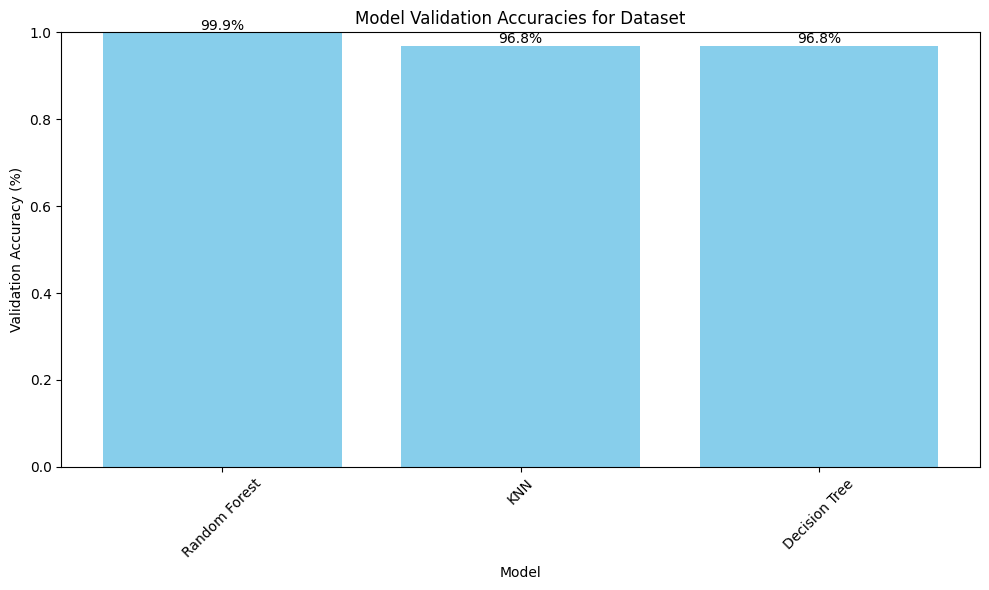

In [50]:
import matplotlib.pyplot as plt
model_names = list(acc_set.keys())
accuracy_values = list(acc_set.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height * 100:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Model')
plt.ylabel('Validation Accuracy (%)')
plt.title('Model Validation Accuracies for Dataset')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()